In [1]:
import pandas as pd
import zipfile
import os
from func import *

def load_data():
    """Загрузка данных из ZIP-архива с расширенной обработкой ошибок"""
    if not os.path.exists('hh.zip'):
            raise FileNotFoundError("Файл hh.zip не найден в рабочей директории")
        
    if not zipfile.is_zipfile('hh.zip'):
            raise ValueError("Файл не является ZIP-архивом или поврежден")
        
    with zipfile.ZipFile('hh.zip', 'r') as zipf:
            if 'hh.csv' not in zipf.namelist():
                available_files = "\n".join(zipf.namelist())
                raise ValueError(f"Файл hh.csv не найден в архиве. Доступные файлы:\n{available_files}")
            
            with zipf.open('hh.csv') as file:
                try:
                    df = pd.read_csv(file, encoding='utf-8')
                except UnicodeDecodeError:
                    file.seek(0)
                    df = pd.read_csv(file, encoding='cp1251')
                
                if df.empty:
                    raise ValueError("CSV-файл загружен, но не содержит данных")
                
                return df

In [2]:
df = fill_none_1(load_data())

In [3]:
train = df[(df['salary_from'] != 0) & (df['salary_to'] != 0)]

<Axes: ylabel='Frequency'>

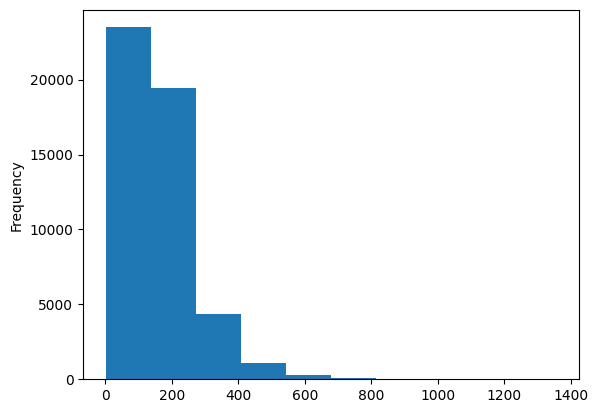

In [4]:
train['description'].apply(lambda x: len(x.split())).plot.hist()

In [5]:
import pandas as pd

def is_numeric(value):
    try:
        pd.to_numeric(value)
        return True
    except (ValueError, TypeError):
        return False

In [6]:
train['description'] = train['description'].str.lower()

C:\Users\aleevseeval\AppData\Local\Temp\ipykernel_12128\2316221313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['description'] = train['description'].str.lower()


In [7]:
itog = []
for i in list(train['skills'].apply(lambda x: x.split(', '))):
    itog.extend(i)

In [8]:
itog_hard = []
for i in list(train['hard_skills'].apply(lambda x: x.split(', '))):
    itog_hard.extend(i)

In [9]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import eli5
import matplotlib.pyplot as plt
import dask.dataframe as dd
from nltk.corpus import stopwords
from pymorphy3 import MorphAnalyzer
import nltk
import re
import seaborn as sns
from dask.diagnostics import ProgressBar

In [17]:
nltk.download('stopwords')
russian_stopwords = stopwords.words('russian')

morph = MorphAnalyzer()

def preprocess_text(text):
    words = text.split(', ')
    lemmas = [morph.parse(word)[0].normal_form for word in words]
    return ' '.join(lemmas)

def preprocess_text_2(text):
    text = re.sub(r'[^а-яёА-ЯЁ ]', '', text)
    words = text.split()
    lemmas = [morph.parse(word)[0].normal_form for word in words]
    return ' '.join(lemmas)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aleevseeval\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
train['clear_skills'] = train['skills'].apply(preprocess_text)

C:\Users\aleevseeval\AppData\Local\Temp\ipykernel_12128\1355225387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['clear_skills'] = train['skills'].apply(preprocess_text)


In [ ]:
spec = train['role_name'].apply(preprocess_text)

In [39]:
train['all'] = train['region_name'] + ' ' + train['experience_category'] + train['schedule_label'] + ' ' + train['employment_label'] + train['skills'] + ' ' + 

,data_source,v_id,id,date_published,is_open,name,description,salary_from,salary_to,salary_currency,...,region_name,region_district_id,region_district_name,role_id,role_name,skills,hard_skills,soft_skills,experience_category,clear_skills
0,superjob,002c181d-02ff-bc9c-0a61-84f51501f72a,ddc0e7a2-3fb9-11ed-a9b7-dbfed3997e57,2023-10-09,1,Инженер по пусконаладке станков / Сервисный ин...,наладка и проведение испытаний балансировочных...,80000,100000,RUB,...,Москва,1,Центральный,0,Инженер по пусконаладке станков / Сервисный ин...,мерчандайзинг,мерчандайзинг,Не указаны,1-3 года,мерчандайзинг
1,superjob,00efeefa-3424-b47d-d29f-ca7baca22653,95e44fd0-3d06-11ee-b683-dbfed3997e57,2023-09-09,1,Инженер (2 категории),обязанности:- монтаж/демонтаж систем широкопол...,60000,120000,RUB,...,Ханты-Мансийский АО - Югра,5,Уральский,0,Инженер (2 категории),мерчандайзинг,мерчандайзинг,Не указаны,1-3 года,мерчандайзинг
2,superjob,01202c78-e3e4-4d4a-f42d-001fdd73ed51,17600752-d468-11ed-b282-dbfed3997e57,2023-08-31,0,Начальник кабинета автоматизированных систем у...,условия: поликлиника находится в историческом...,100000,100000,RUB,...,Санкт-Петербург,2,Северо-Западный,0,Начальник кабинета автоматизированных систем у...,мерчандайзинг,мерчандайзинг,Не указаны,1-3 года,мерчандайзинг
3,superjob,0130559c-07d5-c042-80ca-722d4441df74,1d435c52-964f-11ed-a841-dbfed3997e57,2023-03-18,0,Senior 1С программист,роль в компании: доработка нового функционала ...,200000,200000,RUB,...,Москва,1,Центральный,0,Senior 1С программист,мерчандайзинг,мерчандайзинг,Не указаны,1-3 года,мерчандайзинг
5,superjob,01ee16f7-bec2-f62c-c420-c9b43bd55e35,f7d763f1-051e-11ee-81f4-dbfed3997e57,2023-07-30,0,Поведенческий аналитик/педагог (АВА-терапист/д...,индивидуальная работа с детьми с овз (главным ...,30000,60000,RUB,...,Новосибирская область,6,Сибирский,0,Поведенческий аналитик/педагог (АВА-терапист/д...,мерчандайзинг,мерчандайзинг,Не указаны,Без опыта,мерчандайзинг
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149797,hh,fcbcb3f3-5740-4042-455e-405948d737cc,71020248,2022-11-10,0,Мерчендайзер (м.Дыбенко/Кудрово),открыто 2 торговые точки на совмещение/подрабо...,9160,12000,RUB,...,Санкт-Петербург,2,Северо-Западный,77,Мерчандайзер,мерчандайзинг,мерчандайзинг,Не указаны,Без опыта,мерчандайзинг
149799,hh,fcbdc731-9d8a-33b5-ac12-0952503c0e26,85069702,2023-08-14,0,Аккаунт-менеджер,wildspace.shop - ведущая дизайн-студия для сел...,50000,100000,RUB,...,Москва,1,Центральный,107,Руководитель проектов,"коммуникативная грамотность, подготовка коммер...",подготовка коммерческих предложений,"коммуникативная грамотность, публичные выступл...",1-3 года,коммуникативная грамотность подготовка коммерч...
149802,hh,fcc003af-aea1-f0ef-2dd0-5af81532372c,85424758,2023-08-21,0,Маркетолог,обязанности: анализ целевой аудитории анализ ...,45935,53591,RUB,...,Алматы,0,Не указан,68,"Менеджер по маркетингу, интернет-маркетолог","знание основ области маркетинга, swot анализ, ...","знание основ области маркетинга, swot анализ, ...",самоорганизованность,Более 3 лет,знание основ области маркетинг swot анализ ана...
149805,hh,fcc133d7-318b-2dec-3743-cb4df8f7768c,79108952,2023-10-04,0,Кладовщик / грузчик / работник склада,обязанности: - прием и выдача товара в произ...,45000,50000,RUB,...,Москва,1,Центральный,31,Грузчик,выполнение производственного технического конт...,выполнение производственного технического конт...,Не указаны,Без опыта,выполнение производственного технического конт...


In [44]:
train

,data_source,v_id,id,date_published,is_open,name,description,salary_from,salary_to,salary_currency,experience,employer_name,employer_type_label,employer_industry_id,employer_industry_name,employer_department_name,accept_kids,accept_handicapped,schedule_label,employment_label,country_id,country_name,region_id,region_name,region_district_id,region_district_name,role_id,role_name,skills,hard_skills,soft_skills,experience_category,clear_skills
0,superjob,002c181d-02ff-bc9c-0a61-84f51501f72a,ddc0e7a2-3fb9-11ed-a9b7-dbfed3997e57,2023-10-09,1,Инженер по пусконаладке станков / Сервисный ин...,наладка и проведение испытаний балансировочных...,80000,100000,RUB,1-3,ДИАМЕХ 2000,Организация,26,"Информационные технологии, телекоммуникации",Медиа Бизнес Солюшенс,0,0,Полный день,Полная занятость,113,Россия,347,Москва,1,Центральный,0,Инженер по пусконаладке станков / Сервисный ин...,мерчандайзинг,мерчандайзинг,Не указаны,1-3 года,мерчандайзинг
1,superjob,00efeefa-3424-b47d-d29f-ca7baca22653,95e44fd0-3d06-11ee-b683-dbfed3997e57,2023-09-09,1,Инженер (2 категории),обязанности:- монтаж/демонтаж систем широкопол...,60000,120000,RUB,1-3,ИНФОРМ,Организация,26,"Информационные технологии, телекоммуникации",Медиа Бизнес Солюшенс,0,0,Вахтовый метод,Полная занятость,113,Россия,578,Ханты-Мансийский АО - Югра,5,Уральский,0,Инженер (2 категории),мерчандайзинг,мерчандайзинг,Не указаны,1-3 года,мерчандайзинг
2,superjob,01202c78-e3e4-4d4a-f42d-001fdd73ed51,17600752-d468-11ed-b282-dbfed3997e57,2023-08-31,0,Начальник кабинета автоматизированных систем у...,условия: поликлиника находится в историческом...,100000,100000,RUB,1-3,ГУЗ Городская поликлиника №27,Организация,26,"Информационные технологии, телекоммуникации",Медиа Бизнес Солюшенс,0,0,Полный день,Полная занятость,113,Россия,475,Санкт-Петербург,2,Северо-Западный,0,Начальник кабинета автоматизированных систем у...,мерчандайзинг,мерчандайзинг,Не указаны,1-3 года,мерчандайзинг
3,superjob,0130559c-07d5-c042-80ca-722d4441df74,1d435c52-964f-11ed-a841-dbfed3997e57,2023-03-18,0,Senior 1С программист,роль в компании: доработка нового функционала ...,200000,200000,RUB,1-3,АЛЬФАСКЛАД,Организация,26,"Информационные технологии, телекоммуникации",Медиа Бизнес Солюшенс,0,0,Полный день,Полная занятость,113,Россия,347,Москва,1,Центральный,0,Senior 1С программист,мерчандайзинг,мерчандайзинг,Не указаны,1-3 года,мерчандайзинг
5,superjob,01ee16f7-bec2-f62c-c420-c9b43bd55e35,f7d763f1-051e-11ee-81f4-dbfed3997e57,2023-07-30,0,Поведенческий аналитик/педагог (АВА-терапист/д...,индивидуальная работа с детьми с овз (главным ...,30000,60000,RUB,0,Jobers,Организация,26,"Информационные технологии, телекоммуникации",Медиа Бизнес Солюшенс,0,0,Полный день,Полная занятость,113,Россия,371,Новосибирская область,6,Сибирский,0,Поведенческий аналитик/педагог (АВА-терапист/д...,мерчандайзинг,мерчандайзинг,Не указаны,Без опыта,мерчандайзинг
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149797,hh,fcbcb3f3-5740-4042-455e-405948d737cc,71020248,2022-11-10,0,Мерчендайзер (м.Дыбенко/Кудрово),открыто 2 торговые точки на совмещение/подрабо...,9160,12000,RUB,0,Action,Организация,26,"Информационные технологии, телекоммуникации",Медиа Бизнес Солюшенс,0,0,Гибкий график,Частичная занятость,113,Россия,475,Санкт-Петербург,2,Северо-Западный,77,Мерчандайзер,мерчандайзинг,мерчандайзинг,Не указаны,Без опыта,мерчандайзинг
149799,hh,fcbdc731-9d8a-33b5-ac12-0952503c0e26,85069702,2023-08-14,0,Аккаунт-менеджер,wildspace.shop - ведущая дизайн-студия для сел...,50000,100000,RUB,1-3,WildSpace,Организация,26,"Информационные технологии, телекоммуникации",Медиа Бизнес Солюшенс,0,0,Удаленная работа,Полная занятость,113,Россия,347,Москва,1,Центральный,107,Руководитель проектов,"коммуникативная грамотность, подготовка коммер...",подготовка коммерческих предложений,"коммуникативная грамотность, публичные выступл...",1-3 года,коммуникативная грамотность подготовка коммерч...
149802,hh,fcc003af-a

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    train['clear_skills'], 
    train['salary_from'], 
    test_size=0.2, 
    random_state=42
)

In [32]:
vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words=russian_stopwords,  # русские стоп-слова          # учитываем словосочетания
    preprocessor=preprocess_text,
)

In [33]:
X = vectorizer.fit_transform(X_train)

c:\Users\aleevseeval\shpad-career-lab\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['большой', 'весь', 'всё', 'ещё', 'мочь', 'нибыть', 'свой', 'хороший', 'это'] not in stop_words.
  warnings.warn(


In [25]:
model = LinearRegression()

In [37]:
model.fit(X, y_train)

LinearRegression()

In [38]:
eli5.show_weights(
    model,
    vec=vectorizer,
    top=20,
    target_names=["Зарплата (руб)"]
)

Weight?,Feature
+389541.703,helm
+383836.832,woocommerce
+352699.627,учёт
+307501.177,exchange
+298920.658,appsflyer
+275170.232,devops
+249484.147,экономический
+237222.087,rabbitmq
+205257.818,xcode
+203953.874,pinnacle
